In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import scipy
from scipy import stats
from scipy import special

plt.rcParams['figure.figsize'] = (20,15)

# A little statistics

## 1.B

In [3]:
sigmas = []
ps = []
for x in range(21):
    sigmas.append(x/10) 
    p = 0.5 * special.erfc(sigmas[-1]/np.sqrt(2))
    ps.append(p)
prob = pd.DataFrame({
    'X$\sigma$':sigmas,
    'Probability':ps
})
prob

,X$\sigma$,Probability
0,0.0,0.500000
1,0.1,0.460172
2,0.2,0.420740
3,0.3,0.382089
4,0.4,0.344578
5,0.5,0.308538
6,0.6,0.274253
7,0.7,0.241964
8,0.8,0.211855
9,0.9,0.184060


## 1.C

In [4]:
s = []
for p in ps:
    s.append(np.round(stats.norm.ppf(p), decimals=1))
sigma = pd.DataFrame({
    'Probability':ps,
    '$X\sigma$': s
})
sigma

,Probability,$X\sigma$
0,0.500000,0.0
1,0.460172,-0.1
2,0.420740,-0.2
3,0.382089,-0.3
4,0.344578,-0.4
5,0.308538,-0.5
6,0.274253,-0.6
7,0.241964,-0.7
8,0.211855,-0.8
9,0.184060,-0.9


## 1.D

The cumulative distribution function $cdf(X\sigma)$ gives you the probability that a measurement is less than or equal to $X\sigma$--i.e., to the left of $X\sigma$. However, we calculated the probability that the measurement is greater than or equal to $X\sigma$--i.e., to the right of $X\sigma$. Since the normal distribution is symmetrical, the probability to the right of $X\sigma$ is equal to the probability to the left of $-X\sigma$. Therefore, when we fed our probabilities into the $ppf()$ function, we essentially gave it the argument $cdf(-X\sigma)$. Since these two functions are inverses of each other, $ppf(cdf(-X\sigma))$ returns $-X\sigma$.

## 2.A
### The Chi-Squared Distribution
The chi-squared distribution is has a parameter $k$, defined as the number of degrees of freedom. It is the distribution of the sum of the squared of $k$ independent random variables and has the following PDF: $$P_k(x)=\frac{x^{\frac{k}{2}-1}e^{-\frac{x}{2}}}{2^{\frac{k}{2}}\Gamma\left(\frac{k}{2}\right)},$$ with $\mu=k$ and $\sigma=2k$. It is used to test for statistical independence and line fitting.

## 2.B

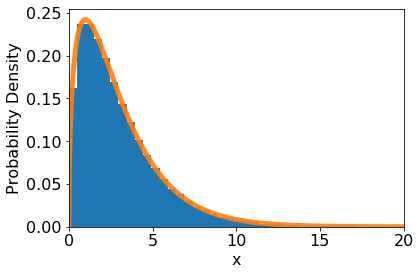

In [5]:
d = stats.chi2.rvs(3, size = 100000)
fig, ax = plt.subplots(1,1)
ax.hist(d,50,density=True)
plt.tick_params(labelsize=16)
plt.xlim([0.00,20.0])
x = np.linspace(0.00,20.0,1000)
ax.plot(x,stats.chi2.pdf(x,3),linewidth=5,alpha=0.9)
ax.set_ylabel('Probability Density',size=16)
ax.set_xlabel('x',size=16)
plt.show()

## 3.B
What is the probability that a measurement is the result of background?

## 3.C
$$P(13) = \frac{1}{2^{3/2}\Gamma(3/2)}\int_{13}^\infty x^{1/2}e^{-x/2}dx$$

## 3.D

In [6]:
p = 1 - stats.chi2.cdf(13,3)
print(f'The probability that {val} was the result of background is {p}.')

NameError: name 'val' is not defined

## 3.E

In [ ]:
print(f'The \'sigma\' associated with this probability is {stats.chi2.ppf(p,3)}.')

## 4

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15, 3))
x = np.linspace(0,20,1000)
x_ppf = np.linspace(0,1,1000)

ax[0].plot(x,stats.chi2.pdf(x,3))
ax[0].set_title('Chi-squared PDF (k=3)')
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('Probability Density')

ax[1].plot(x,1 - stats.chi2.cdf(x,3))
ax[1].set_title('1 - Chi-squared CDF (k=3)')
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('Probability')
plt.show()

In [ ]:
measurements = np.sort(np.random.random(10)*15)
probabilities = []
sigmas = []
for m in measurements:
    probabilities.append(1 - stats.chi2.cdf(m,3))
    sigmas.append(stats.chi2.ppf(probabilities[-1],3))
data = pd.DataFrame({
    'Measurement': measurements,
    'Probability': probabilities,
    '$X\sigma$': sigmas
})
data

As the value of the measurement increases, the probability of it being the result of background decreases, as does the 'sigma'.

# Non-continuous Distributions

## 1.A
### The Binomial Distribution
The binomial distribution is a discrete probability distribution with parameters $n$ and $p$. It is used to determine the probability of an experiment being successful $k$ times out of $n$ given a probability of success $p$ for each independent experiment. It has $\mu=np$ and $\sigma=np(1-p)$.

## 1.B

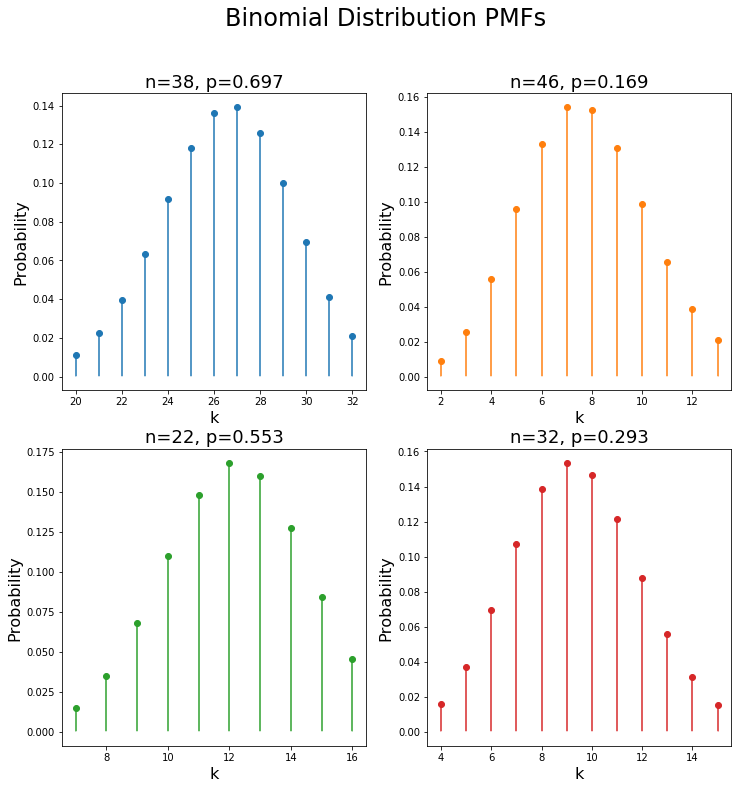

In [7]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
fig.suptitle('Binomial Distribution PMFs', fontsize=24)
c = 0
for i in range(1,3):
    for j in range(1,3):
        n = np.random.randint(10,50)
        p = np.random.random(1)[0]
        x = np.arange(stats.binom.ppf(0.01,n,p),stats.binom.ppf(0.99,n,p))
        ax[i-1,j-1].set_title(f'n={n}, p={np.round(p,decimals=3)}',size=18)
        ax[i-1,j-1].set_ylabel('Probability',size=16)
        ax[i-1,j-1].set_xlabel('k',size=16)
        ax[i-1,j-1].stem(x,stats.binom.pmf(x,n,p),f'C{c}-',f'C{c}o',basefmt='w',use_line_collection=True)
        c+=1
plt.show()

The binomial distribution function has parameters $n$, which represents the number of independent observations to be made, and $p$, which represents the probability that a particular observation will be succcessful.

## 1.C
Given $n$ experiments, each with a probability $p$ of success, what is the probability that a total of $k$ of them will be successful?

If there are $n$ total experiments, and $k$ of them are successful, then $n-k$ of them are not, and if the probability of success is $p$, then the probability of failure is $(1-p)$. Therefore, the probability of getting $k$ successful outcomes is $$p^k(1-p)^{n-k}.$$

But there are also multiple ways to get $k$ successful outcomes, so we need to multiply this probability by the binomial coefficient ${n\choose k}$ which gives the number of ways of getting $k$ successes. Therefore, the probability $k$ experiments out of $n$ being successful is given by the probability mass function $$f(k,n,p)={n\choose k}p^k(1-p)^{n-k}.$$ 

## 1.D
A continuous probability distribution carries an inherent uncertainty due to the fact that we can only determine the probability that a random continuous variable will be within a certain range, not the probability that a random continuous variable will be a specific value. With a discrete distribution each possible value of a random discrete variable has a definite probability.

## 1.E

In a binomial distribution the probability that $k$ out of $n$ experiments will be succcessful is discrete. However, the probability $p$ that a single independent experiment will be successful is continuous. Therefore $\mu=np$ and $\sigma=np(1-p)$ are also continuous.